In [1]:
from bs4 import BeautifulSoup
from urllib.parse import urljoin, urlparse
import shutil, os, time, datetime, re
import pandas as pd
from PIL import Image
from scraper import DataPreparation, Corpus
from analyzer import Analyzer

# TODO

- carousel finder
- select some features from builtwith

# WORKFLOW

1. Create Corpus with `Corpus.initCorpus()` (once initialized, you do not have to initialize it again).
2. Prepare the website data in the corpus (via `DataPreparation()` class).

    1. Download and analyze images via `DataPreparation.getImages()`.
    2. Once you have downloaded the data for the current corpus, you do not need to download and analyze the images again. You can no access them via `DataPreparation.getImagesFromPickle()`.
    3. Analyze the infrastructure of the websites with `DataPreparation.getBuiltWith()`. Once you have done this, you can access the data via `DataPreparation.getBuiltWithFromPickle()`.
    4. Create and save a dictionary with all the results (except those from `DataPreparation.getBuiltWith()`) via `DataPreparation.createAnalyzerDict()`.

3. The clustering of the data dictionary and the analysis of the `builtwith` data are conducted with the `Analyzer` class.
    1.To cluster the data in the dictionary created with `DataPreparation.createAnalyzerDict()`, the user can choose the columns that should be selected with the help of the method `Analyzer.setColumnSelection()`. The data can then be clustered with the method `Analyzer.clusterDataKMeans()`. However, it is advisable to standardize the data first with the method `Analyzer.standardizeData()`.
    2. To figure out which n works best in the `Analyzer.clusterDataKMeans()` method, the user can use `Analyzer.createElbowPlot()`.
    3. The results of the clustering can be visualized with `Analyzer.visualizeCluster()`-
    4. To analyze the `builtwith` data, the user first needs to execute `Analyzer.getBuiltWithCategorical()`.
    5. Then, the data can be anaylzed using cosine with `Analyzer.getCosine4CategoricalData()`.

# Corpus Creation

In [2]:
cp = Corpus()

In [4]:
cp.initCorpus()

Are you sure you want to (re-)init the corpus data? (older data in folder CorpusData will be lost. Make backup first) (Y/N)y
Starting process of downloading coprus data. This might take a while.
How many websites do you want to scrape?12
Couldn't find consent submission on this page!
Couldn't find consent submission on this page!
Couldn't find consent submission on this page!
Couldn't find consent submission on this page!
Couldn't find consent submission on this page!
Couldn't find consent submission on this page!
Couldn't find consent submission on this page!
Couldn't find consent submission on this page!
Couldn't find consent submission on this page!
Couldn't find consent submission on this page!
Couldn't find consent submission on this page!
Couldn't find consent submission on this page!


# Data Preparation

In [5]:
dp = DataPreparation()

Checking background images...
{'https://f-origin.hypotheses.org/wp-content/blogs.dir/2379/files/2014/12/banner_marginalien.jpg': {'height': 288, 'width': 1000}, 'https://f-origin.hypotheses.org/wp-content/blogs.dir/2379/files/2015/11/IMG_7706-5-500x247.jpg': {'height': 259, 'width': 510}, 'https://f-origin.hypotheses.org/wp-content/blogs.dir/2379/files/2020/10/marina-khrapova-nE4CsEL9Z_s-unsplash-500x333.jpg': {'height': 344, 'width': 510}, 'https://s.w.org/images/core/emoji/13.0.0/svg/21a9.svg': {'height': 12, 'width': 12}, 'https://f-origin.hypotheses.org/wp-content/blogs.dir/2379/files/2020/05/nordwood-themes-yyMJNPgQ-X8-unsplash-500x333.jpg': {'height': 398, 'width': 591}}
Checking background images...
Found background-image URL! '/ekd_de/ds_img/assets_slider/20161017_lutherbibel_rdax_60.jpg'
Found background-image URL! '/ekd_de/ds_img/assets_slider/20161017_lutherbibel_rdax_60.jpg'
Found background-image URL! '/ekd_de/ds_img/assets_slider/20161017_lutherbibel_rdax_60.jpg'
Found ba

Checking background images...
{'https://static.cgames.de/gs_cb/assets/core/images/GS_logo_white.svg': {'height': 30, 'width': 158}, 'https://www.gamestar.de/img/plus/gs_shop_logo.svg': {'height': 30, 'width': 70}, 'https://www.gamestar.de/img/plus/gsp_plus_logo_white.svg': {'height': 30, 'width': 70}, 'https://9images.cgames.de/images/gamestar/210/crying-suns_6038158.jpg': {'height': 410, 'width': 728}, 'https://9images.cgames.de/images/gamestar/256/highlightbild-endlich-beantwortet-fritz-die-fragen-die-er-bisher-nur-stellen-durfte_6124488.jpg': {'height': 196, 'width': 348}, 'https://3images.cgames.de/images/gamestar/256/neue-spiele-im-januar_6125632.jpg': {'height': 196, 'width': 348}, 'https://3images.cgames.de/images/gamestar/256/cod-vs-warzone_6125652.jpg': {'height': 196, 'width': 348}, 'https://9images.cgames.de/images/gamestar/256/schluss-mit-dmr-dominanz-in-cod-warzone-zumindest-ist-schon-ein-patch-mit-nerfs-unterwegs_6125628.jpg': {'height': 196, 'width': 348}, 'https://10ima

Checking background images...
Found background-image URL! https://www.oma-kocht.de/wp-content/uploads/2018/08/Weißkohl-e1609358663193.jpg
Found background-image URL! https://www.oma-kocht.de/wp-content/uploads/2020/09/Butternut-kuerbis-ganz.jpg
Found background-image URL! https://www.oma-kocht.de/wp-content/uploads/2019/01/porreesalat-rezept-oma-einfach-schnell2-e1564064159187.jpg
Found background-image URL! https://www.oma-kocht.de/wp-content/uploads/2018/10/pfel-e1609359282986.jpg
{'https://www.oma-kocht.de/wp-content/uploads/2020/12/cropped-Logo_Oma-Silvester_300-px.png': {'height': 126, 'width': 300}, 'https://www.oma-kocht.de/wp-content/uploads/2020/06/Traditionelle-Rezepte-Oma-Kocht2.jpg': {'height': 465, 'width': 826}, 'https://www.oma-kocht.de/wp-content/uploads/2020/12/Rehgeschnetzelt_Rahm_Pilze.jpg': {'height': 297, 'width': 396}, 'https://www.oma-kocht.de/wp-content/uploads/2020/04/Design-ohne-Titel-2-e1586773969823-150x150.jpg': {'height': 150, 'width': 150}, 'https://www.o
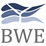

Checking background images...
{'https://www.windows-faq.de/wp-content/uploads/2016/09/Windows-FAQ_350x85.png': {'height': 85, 'width': 350}, 'https://www.windows-faq.de/wp-content/uploads/2020/11/Windows-FAQ-Weihnachtsgewinnspiel-2020-380x214.png': {'height': 214, 'width': 380}, 'https://www.windows-faq.de/wp-content/uploads/2020/11/Windows-Umgebungsvariablen-380x214.png': {'height': 214, 'width': 380}, 'https://www.windows-faq.de/wp-content/uploads/2020/11/Windows-Defender-Antivirus-Pfadausschl%C3%BCsse-380x214.png': {'height': 214, 'width': 380}, 'https://www.windows-faq.de/wp-content/uploads/2020/04/Diskview-380x214.png': {'height': 214, 'width': 380}, 'https://www.windows-faq.de/wp-content/uploads/2020/11/Microsoft-To-Do-App-380x214.png': {'height': 214, 'width': 380}, 'https://www.windows-faq.de/wp-content/uploads/2020/09/St%C3%B6rungen-Microsoft-Cloud-Online-380x214.png': {'height': 214, 'width': 380}, 'https://www.windows-faq.de/wp-content/uploads/2020/09/WLAN-Sicherheitsschl%C3

{'marginalie.hypotheses.org': {'total_images': 5,
  'big_images': 1,
  'middle_images': 3,
  'small_images': 1,
  'background_images': 0,
  'images': {'https://f-origin.hypotheses.org/wp-content/blogs.dir/2379/files/2014/12/banner_marginalien.jpg': {'height': 288,
    'width': 1000},
   'https://f-origin.hypotheses.org/wp-content/blogs.dir/2379/files/2015/11/IMG_7706-5-500x247.jpg': {'height': 259,
    'width': 510},
   'https://f-origin.hypotheses.org/wp-content/blogs.dir/2379/files/2020/10/marina-khrapova-nE4CsEL9Z_s-unsplash-500x333.jpg': {'height': 344,
    'width': 510},
   'https://s.w.org/images/core/emoji/13.0.0/svg/21a9.svg': {'height': 12,
    'width': 12},
   'https://f-origin.hypotheses.org/wp-content/blogs.dir/2379/files/2020/05/nordwood-themes-yyMJNPgQ-X8-unsplash-500x333.jpg': {'height': 398,
    'width': 591}}},
 'ekd.de': {'total_images': 36,
  'big_images': 1,
  'middle_images': 1,
  'small_images': 34,
  'background_images': 0,
  'images': {'https://www.ekd.de/ekd_de
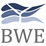

In [6]:
dp.getImages()

In [ ]:
#bw_dict = dp.getBuiltWith()

In [ ]:
#bw_dict = dp.getBuiltWithFromPickle()

In [ ]:
#bw_dict

In [7]:
data_dict = dp.createAnalyzerDict()

<DirEntry 'INFO.txt'>
<DirEntry 'marginalie.hypotheses.org.html'>
<DirEntry 'www.ekd.de.html'>
<DirEntry 'www.faz.net.html'>
<DirEntry 'www.gamestar.de.html'>
<DirEntry 'www.liebesleben.de.html'>
<DirEntry 'www.netzwerk-ebd.de.html'>
<DirEntry 'www.nike.com.html'>
<DirEntry 'www.nytimes.com.html'>
<DirEntry 'www.oma-kocht.de.html'>
<DirEntry 'www.spd.de.html'>
<DirEntry 'www.wind-energie.de.html'>
<DirEntry 'www.windows-faq.de.html'>


# Analysis

In [2]:
ana = Analyzer()

In [3]:
# Categorical Data from builtwith

In [4]:
#bw_data = ana.getBuiltWithCategorical()

In [5]:
#bw_clustered = ana.getCosine4CategoricalData(bw_data)

In [6]:
#bw_data

In [7]:
#bw_clustered

In [8]:
# KMeans clustering and standardization

In [3]:
ana.setColumnSelection(['RA_big_images/total_images', 'RA_middle_images/total_images', 'RA_small_images/total_images'])

Columns successfully changed!


In [4]:
ana.getColumnSelection()

Currently, the following columns are selected: ['RA_big_images/total_images', 'RA_middle_images/total_images', 'RA_small_images/total_images']


In [5]:
ana_small = ana.data_df[ana.column_selection]

In [6]:
standardized_data = ana.standardizeData(ana_small)

In [7]:
clustered_data = ana.clusterDataKMeans(standardized_data, n=4)

Websites in cluster 0:
-----------------------------------------------

spd.de
https://www.spd.de/

Websites in cluster 1:
-----------------------------------------------

marginalie.hypotheses.org
https://marginalie.hypotheses.org/
faz.net
https://www.faz.net/aktuell/

Websites in cluster 2:
-----------------------------------------------

ekd.de
https://www.ekd.de/
gamestar.de
https://www.gamestar.de/
liebesleben.de
https://www.liebesleben.de/
netzwerk-ebd.de
https://www.netzwerk-ebd.de/
nytimes.com
https://www.nytimes.com/
oma-kocht.de
https://www.oma-kocht.de/
windows-faq.de
https://www.windows-faq.de/

Websites in cluster 3:
-----------------------------------------------

nike.com
https://www.nike.com/
wind-energie.de
https://www.wind-energie.de/die-windkraft/



Creating elbow plot in range between [2, 3, 4, 5, 6, 7, 8] n for KMeans.


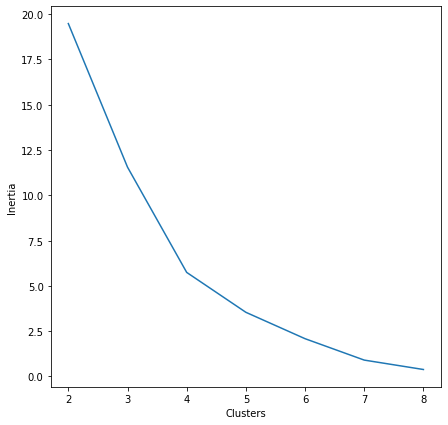

In [8]:
ana.createElbowPlot(clustered_data)

In [15]:
#ana.visualizeCluster(clustered_data, "total_length", "total_images")

In [9]:
ana.getScreenshotsFromClusters(clustered_data)

marginalie.hypotheses.org
1
Press enter to continue and take screenshot of page...
Screenshots/1/marginalie.hypotheses.org.png
ekd.de
2
Press enter to continue and take screenshot of page...
Screenshots/2/ekd.de.png
faz.net
1
Press enter to continue and take screenshot of page...
Screenshots/1/faz.net.png
gamestar.de
2
Press enter to continue and take screenshot of page...
Screenshots/2/gamestar.de.png
liebesleben.de
2
Press enter to continue and take screenshot of page...
Screenshots/2/liebesleben.de.png
netzwerk-ebd.de
2
Press enter to continue and take screenshot of page...
Screenshots/2/netzwerk-ebd.de.png
nike.com
3
Press enter to continue and take screenshot of page...
Screenshots/3/nike.com.png
nytimes.com
2
Press enter to continue and take screenshot of page...
Screenshots/2/nytimes.com.png
oma-kocht.de
2
Press enter to continue and take screenshot of page...
Screenshots/2/oma-kocht.de.png
spd.de
0
Press enter to continue and take screenshot of page...
Screenshots/0/spd.de.png


In [20]:
clustered_data

,RA_big_images/total_images_scaled,RA_middle_images/total_images_scaled,RA_small_images/total_images_scaled,RA_total_images/total_length_scaled,clusters
marginalie.hypotheses.org,0.017534,0.059912,-0.044700,-1.136413,0
ekd.de,-0.717819,-1.151508,1.130706,0.604521,1
faz.net,0.169676,1.675140,-1.021191,-1.560320,3
gamestar.de,-0.314412,-1.151508,0.843019,-0.659730,1
liebesleben.de,-0.895318,1.271333,-0.044700,0.204363,2
netzwerk-ebd.de,-0.895318,-0.499205,0.906753,0.843466,1
nike.com,0.579289,0.153098,-0.495388,-0.158777,0
nytimes.com,-0.469320,-0.020849,0.345896,1.578880,2
oma-kocht.de,-0.403782,0.805402,-0.144853,1.140232,2
spd.de,1.234671,-1.151508,-0.261698,-0.500351,0


In [10]:
ana.data_df

,total_images,big_images,middle_images,small_images,background_images,total_length,external_links,internal_links,total_links,RA_big_images/total_images,RA_middle_images/total_images,RA_small_images/total_images,RA_total_images/total_length,RA_internal_links/external_links
marginalie.hypotheses.org,5,1,3,1,0,18258,28,232,260,0.200000,0.600000,0.200000,0.000274,8.285714
ekd.de,36,1,1,34,0,24797,15,485,500,0.027778,0.027778,0.944444,0.001452,32.333333
faz.net,6,1,2,3,0,55218,18,768,786,0.166667,0.333333,0.500000,0.000109,42.666667
gamestar.de,11,1,0,10,0,16259,27,389,416,0.090909,0.000000,0.909091,0.000677,14.407407
liebesleben.de,7,0,2,5,0,5812,11,135,146,0.000000,0.285714,0.714286,0.001204,12.272727
netzwerk-ebd.de,12,0,2,10,0,7983,21,180,201,0.000000,0.166667,0.833333,0.001503,8.571429
nike.com,12,6,6,0,0,13281,6,559,565,0.500000,0.500000,0.000000,0.000904,93.166667
nytimes.com,17,0,2,15,0,7450,5,130,135,0.000000,0.117647,0.882353,0.002282,26.000000
oma-kocht.de,14,1,3,10,0,7204,12,292,304,0.071429,0.214286,0.714286,0.001943,24.333333
spd.de,3,1,0,2,0,3913,4,111,115,0.333333,0.000000,0.666667,0.000767,27.750000


# Testing stuff

In [ ]:
#try and get live image sizes

In [59]:
from selenium import webdriver
from selenium.webdriver.support import expected_conditions as EC

In [35]:
wbdriver = webdriver.Edge("webdriver/msedgedriver.exe")

In [60]:
page = wbdriver.get("https://www.nytimes.com")

In [37]:
wbdriver.maximize_window()

In [74]:
imgs = wbdriver.find_elements_by_tag_name("img")

In [76]:
true_counter = 0
for img in imgs:
    print(img.get_attribute("src"))
    print(img.size)
    print(img.is_displayed())
    if img.is_displayed():
        true_counter += 1

https://static01.nyt.com/images/2017/01/29/podcasts/the-daily-album-art/the-daily-album-art-square320-v4.png
{'height': 45, 'width': 45}
True
https://static01.nyt.com/images/2020/09/03/podcasts/sway-album-art/sway-album-art-square320-v10.jpg
{'height': 45, 'width': 45}
True
https://static01.nyt.com/images/2020/12/10/multimedia/tips-bb-promo-image/tips-bb-promo-1607639510132-thumbLarge.png
{'height': 45, 'width': 45}
True
https://static01.nyt.com/images/2021/01/05/us/05GEORGIA-hp-slide-BW5U/05GEORGIA-hp-slide-BW5U-videoSixteenByNine1050-v2.jpg
{'height': 329, 'width': 585}
False
https://static01.nyt.com/images/2021/01/05/us/05GEORGIA-hp-slide-JS40/05GEORGIA-hp-slide-JS40-videoSixteenByNine1050-v2.jpg
{'height': 329, 'width': 585}
True
https://static01.nyt.com/images/2021/01/05/us/05GEORGIA-hp-slide-9XVV/05GEORGIA-hp-slide-9XVV-videoSixteenByNine1050-v2.jpg
{'height': 329, 'width': 585}
False
https://static01.nyt.com/images/2021/01/05/us/05GEORGIA-hp-slide-1RFN/05GEORGIA-hp-slide-1RFN-vi

{'height': 257, 'width': 385}
False
https://static01.nyt.com/images/2020/12/14/nyregion/00nyvirus-publicspace4-copy/00nyvirus-publicspace4-copy-square640.jpg
{'height': 0, 'width': 0}
False
https://static01.nyt.com/images/2021/01/06/dining/06Cookbooks/06Cookbooks-square640.jpg?quality=75&auto=webp&disable=upscale&width=350
{'height': 178, 'width': 178}
True
https://static01.nyt.com/images/2021/01/10/books/review/10Miller/10Miller-square640.jpg?quality=75&auto=webp&disable=upscale&width=350
{'height': 178, 'width': 178}
True
https://static01.nyt.com/images/2021/01/05/obituaries/05roberts1-sub/merlin_181960011_cb2cec62-ea41-4900-8762-1eb9e4fffe64-threeByTwoMediumAt2X.jpg?quality=75&auto=webp&disable=upscale&width=1100
{'height': 307, 'width': 461}
True
https://static01.nyt.com/images/2020/12/30/business/00oligarchdivorce01/00oligarchdivorce01-threeByTwoSmallAt2X-v2.jpg?quality=75&auto=webp&disable=upscale&width=400
{'height': 144, 'width': 216}
True
https://static01.nyt.com/images/2020/1

{'height': 144, 'width': 215}
True
https://static01.nyt.com/images/2021/01/03/opinion/03kristof_SR_print/02kristof-02-threeByTwoSmallAt2X.jpg?quality=75&auto=webp&disable=upscale&width=400
{'height': 144, 'width': 215}
True
https://static01.nyt.com/images/2021/01/04/arts/04bridgerton-race1/merlin_180244809_82916376-4d0b-46c0-8f78-e5affff877d9-threeByTwoSmallAt2X.jpg?quality=75&auto=webp&disable=upscale&width=400
{'height': 144, 'width': 215}
True
https://static01.nyt.com/images/2020/12/30/arts/30moynihan-art-11/30moynihan-art-11-threeByTwoSmallAt2X.jpg?quality=75&auto=webp&disable=upscale&width=400
{'height': 144, 'width': 215}
True
https://static01.nyt.com/images/2021/01/03/arts/03fincher-notebook-bts/03fincher-notebook-bts-threeByTwoSmallAt2X-v2.jpg?quality=75&auto=webp&disable=upscale&width=400
{'height': 144, 'width': 215}
True
https://static01.nyt.com/images/2021/01/04/arts/04spiral1/04spiral1-threeByTwoSmallAt2X-v2.jpg?quality=75&auto=webp&disable=upscale&width=400
{'height': 144

In [63]:
bck = wbdriver.find_elements_by_xpath("//*[contains(@style,'background-image')]")

In [68]:
for bb in bck:
    print(bb.value_of_css_property("background-image"))

url("https://static01.nyt.com/newsgraphics/2020/03/16/coronavirus-maps/5990fca4458a05ec9a94c765b40d83fe0b2485fe/build/curve-grid/cases/total/USA.svg")
url("https://static01.nyt.com/newsgraphics/2020/03/16/coronavirus-maps/5990fca4458a05ec9a94c765b40d83fe0b2485fe/build/curve-grid/cases/total/IND.svg")
url("https://static01.nyt.com/newsgraphics/2020/03/16/coronavirus-maps/5990fca4458a05ec9a94c765b40d83fe0b2485fe/build/curve-grid/cases/total/BRA.svg")
url("https://static01.nyt.com/newsgraphics/2020/03/16/coronavirus-maps/5990fca4458a05ec9a94c765b40d83fe0b2485fe/build/curve-grid/cases/total/GBR.svg")
url("https://static01.nyt.com/newsgraphics/2020/03/16/coronavirus-maps/5990fca4458a05ec9a94c765b40d83fe0b2485fe/build/curve-grid/cases/total/MEX.svg")
url("https://static01.nyt.com/newsgraphics/2020/03/16/coronavirus-maps/5990fca4458a05ec9a94c765b40d83fe0b2485fe/build/curve-grid/cases/total/CAN.svg")


In [72]:
elem = wbdriver.find_element_by_text("Subscribe now")

AttributeError: 'WebDriver' object has no attribute 'find_element_by_text'

In [77]:
true_counter

78

In [78]:
len(imgs)

118